# TensorFlow常见函数

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time

np.random.seed(1)

In [2]:
y_hat = tf.constant(36,name="y_hat")            #定义y_hat为固定值36
y = tf.constant(39,name="y")                    #定义y为固定值39
loss = tf.Variable((y-y_hat)**2,name="loss" )   #为损失函数创建一个变量

init = tf.global_variables_initializer()        #运行之后的初始化(session.run(init))  #损失变量将被初始化并准备计算
session=tf.Session()                #创建一个session并打印输出
session.run(init)                           #初始化变量
print(session.run(loss))    

Instructions for updating:
Colocations handled automatically by placer.
9


对于Tensorflow的代码实现而言，实现代码的结构如下：

1. 创建Tensorflow变量（此时，尚未直接计算）

2. 实现Tensorflow变量之间的操作定义

3. 初始化Tensorflow变量

4. 创建Session

5. 运行Session，此时，之前编写操作都会在这一步运行。

In [3]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)
#此时并没有计算

Tensor("Mul:0", shape=(), dtype=int32)


In [4]:
sess = tf.Session()
print(sess.run(c))
#这时才计算了

20


## 占位符
占位符（placeholders）一个对象，它的值只能在稍后指定，要指定占位符的值，可以使用一个feed字典（feed_dict变量）来传入，接下来，我们为x创建一个占位符，这将允许我们在稍后运行会话时传入一个数字。

In [5]:
x = tf.placeholder(tf.int64,name="x")
sess = tf.Session()
print(sess.run(2 * x,feed_dict={x:3}))
sess.close()

6


## 线性函数

In [6]:
def linear_function():
    """
    实现一个线性功能：
        初始化W，类型为tensor的随机变量，维度为(4,3)
        初始化X，类型为tensor的随机变量，维度为(3,1)
        初始化b，类型为tensor的随机变量，维度为(4,1)
    返回：
        result - 运行了session后的结果，运行的是Y = WX + b 

    """

    np.random.seed(1) #指定随机种子

    X = np.random.randn(3,1)
    W = np.random.randn(4,3)
    b = np.random.randn(4,1)

    Y = tf.add(tf.matmul(W,X),b) #tf.matmul是矩阵乘法
    #Y = tf.matmul(W,X) + b #也可以写成这样子

    #创建一个session并运行它
    sess = tf.Session()
    result = sess.run(Y)

    #session使用完毕，关闭它
    sess.close()

    return result

In [7]:
print("result = " +  str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


## 计算sigmoid

In [8]:
def sigmoid(z):
    x = tf.placeholder(tf.float32,name="x")

    #计算sigmoid(z)
    sigmoid = tf.sigmoid(x)

    #创建一个会话，使用方法二
    sess= tf.Session() 
    result = sess.run(sigmoid,feed_dict={x:z})

    return result

In [9]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


## 计算成本

$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$
实现成本函数，需要用到的是:
- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`


In [10]:
def cost(logits, labels):
 
    z = tf.placeholder(tf.float32, name = "logits")
    y = tf.placeholder(tf.float32, name = "labels")
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z,  labels = y)
    
    sess = tf.Session()
    cost = sess.run(cost,feed_dict = {z:logits,y:labels})
    sess.close()
    
    return cost

In [11]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366408  0.41385433 0.39956617]


## 独热编码（0、1编码,softmax回归）
<img src="20180417110137252.png" style="width:600px;height:150px;">
使用代码: 
- tf.one_hot(labels, depth, axis) 

In [12]:
def one_hot_matrix(lables,C):
    """
    创建一个矩阵，其中第i行对应第i个类号，第j列对应第j个训练样本
    所以如果第j个样本对应着第i个标签，那么entry (i,j)将会是1

    参数：
        lables - 标签向量
        C - 分类数

    返回：
        one_hot - 独热矩阵
    """
    #创建一个tf.constant，赋值为C，名字叫C
    C = tf.constant(C,name="C")

    #使用tf.one_hot，注意一下axis
    one_hot_matrix = tf.one_hot(indices=lables , depth=C , axis=0)

   
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()

    return one_hot

In [13]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels,C=4)
print(str(one_hot))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


## 初始化为0和1
用到tf.ones()和tf.zeros()

In [14]:
def ones(shape):
    #使用tf.ones()
    ones = tf.ones(shape)

    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()

    return ones

In [15]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


# 使用TensorFlow构建神经网络
使用TensorFlow构建一个神经网络，需要记住的是实现模型需要做以下两个步骤： 
1. 创建计算图 
2. 运行计算图


##  要解决的问题
  一天下午，我们和一些朋友决定教我们的电脑破译手语。我们花了几个小时在白色的墙壁前拍照，于是就有了了以下数据集。现在，你的任务是建立一个算法，使有语音障碍的人与不懂手语的人交流。

训练集：有从0到5的数字的1080张图片(64x64像素)，每个数字拥有180张图片。
测试集：有从0到5的数字的120张图片(64x64像素)，每个数字拥有5张图片。

- **训练集**: 有从0到5的数字的1080张图片(64x64像素)，每个数字拥有180张图片.
- **测试集**: 有从0到5的数字的120张图片(64x64像素)，每个数字拥有20张图片.
- 目前的模型是：LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX，SIGMOID输出层已经转换为SOFTMAX。当有两个以上的类时，一个SOFTMAX层将SIGMOID一般化
需要注意的是这是完整数据集的一个子集，完整的数据集包含更多的符号。

下面是每个数字的样本，以及我们如何表示标签的解释。这些都是原始图片，我们实际上用的是64 * 64像素的图片。
<img src="20180417110431384.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font 

## 数据处理

In [16]:
X_train_orig , Y_train_orig , X_test_orig , Y_test_orig , classes = tf_utils.load_dataset()
X_train_orig.shape , Y_train_orig.shape

((1080, 64, 64, 3), (1, 1080))

Y = 5


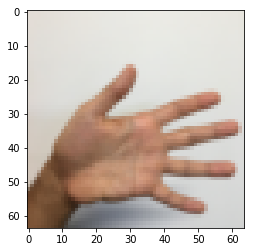

In [17]:
index = 0
plt.imshow(X_train_orig[index])
print("Y = " + str(np.squeeze(Y_train_orig[:,index])))

In [18]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T #每一列就是一个样本
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T

#归一化数据
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

#转换为独热矩阵
Y_train = tf_utils.convert_to_one_hot(Y_train_orig,6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig,6)

print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))

训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


## 创建placeholders

In [19]:
def create_placeholders(n_x,n_y):
    """
    为TensorFlow会话创建占位符
    参数：
        n_x - 一个实数，图片向量的大小（64*64*3 = 12288）
        n_y - 一个实数，分类数（从0到5，所以n_y = 6）

    返回：
        X - 一个数据输入的占位符，维度为[n_x, None]，dtype = "float"
        Y - 一个对应输入的标签的占位符，维度为[n_Y,None]，dtype = "float"

    提示：
        使用None，因为它让我们可以灵活处理占位符提供的样本数量。事实上，测试/训练期间的样本数量是不同的。

    """
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")

    return X, Y

In [20]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_4:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


##  初始化参数
- 初始化tensorflow中的参数，我们将使用Xavier初始化权重和用零来初始化偏差，比如
```python
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
``
- tf.Variable() 每次都在创建新对象，对于get_variable()来说，对于已经创建的变量对象，就把那个对象返回，如果没有创建变量对象的话，就创建一个新的

In [21]:
def initialize_parameters():
    """
    初始化神经网络的参数，参数的维度如下：
        W1 : [25, 12288]
        b1 : [25, 1]
        W2 : [12, 25]
        b2 : [12, 1]
        W3 : [6, 12]
        b3 : [6, 1]

    返回：
        parameters - 包含了W和b的字典


    """

    tf.set_random_seed(1) #指定随机种子

    W1 = tf.get_variable("W1",[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters

In [22]:
tf.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形。 

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


正如预期的那样，这些参数只有物理空间，但是还没有被赋值，这是因为没有通过session执行

## 前向传播
- `tf.add(...,...)`加法
- `tf.matmul(...,...)` 矩阵乘法
- `tf.nn.relu(...)`  ReLU函数

In [23]:
def forward_propagation(X,parameters):
    """
    实现一个模型的前向传播，模型结构为LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX

    参数：
        X - 输入数据的占位符，维度为（输入节点数量，样本数量）
        parameters - 包含了W和b的参数的字典

    返回：
        Z3 - 最后一个LINEAR节点的输出

    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.add(tf.matmul(W1,X),b1)        # Z1 = np.dot(W1, X) + b1
    #Z1 = tf.matmul(W1,X) + b1             #也可以这样写
    A1 = tf.nn.relu(Z1)                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)     # Z3 = np.dot(W3,Z2) + b3


    return Z3

## 计算成本
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```

In [ ]:
def compute_cost(Z3,Y):
    """
    计算成本

    参数：
        Z3 - 前向传播的结果
        Y - 标签，一个占位符，和Z3的维度相同

    返回：
        cost - 成本值


    """
    logits = tf.transpose(Z3) #转置
    labels = tf.transpose(Y)  #转置

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))

    return cost

## 反向传播&更新参数
得益于编程框架，所有反向传播和参数更新都在1行代码中处理。计算成本函数后，将创建一个“optimizer”对象。 运行tf.session时，必须将此对象与成本函数一起调用，当被调用时，它将使用所选择的方法和学习速率对给定成本进行优化。

举个例子，对于梯度下降：
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

要进行优化，应该这样做:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```
编写代码时，我们经常使用 _ 作为一次性变量来存储我们稍后不需要使用的值。 这里，_具有我们不需要的优化器的评估值（并且c取值为成本变量的值）。


##  构建模型

In [ ]:

def model(X_train,Y_train,X_test,Y_test,
        learning_rate=0.0001,num_epochs=1500,minibatch_size=32,
        print_cost=True,is_plot=True):
    """
    实现一个三层的TensorFlow神经网络：LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX

    参数：
        X_train - 训练集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 1080）
        Y_train - 训练集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 1080）
        X_test - 测试集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 120）
        Y_test - 测试集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 120）
        learning_rate - 学习速率
        num_epochs - 整个训练集的遍历次数
        mini_batch_size - 每个小批量数据集的大小
        print_cost - 是否打印成本，每100代打印一次
        is_plot - 是否绘制曲线图

    返回：
        parameters - 学习后的参数

    """
    ops.reset_default_graph()                #能够重新运行模型而不覆盖tf变量
    tf.set_random_seed(1)
    seed = 3
    (n_x , m)  = X_train.shape               #获取输入节点数量和样本数
    n_y = Y_train.shape[0]                   #获取输出节点数量
    costs = []                               #成本集

    #给X和Y创建placeholder
    X,Y = create_placeholders(n_x,n_y)

    #初始化参数
    parameters = initialize_parameters()

    #前向传播
    Z3 = forward_propagation(X,parameters)

    #计算成本
    cost = compute_cost(Z3,Y)

    #反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    #初始化所有的变量
    init = tf.global_variables_initializer()

    #开始会话并计算
    with tf.Session() as sess:
        #初始化
        sess.run(init)

        #正常训练的循环
        for epoch in range(num_epochs):

            epoch_cost = 0  #每代的成本
            num_minibatches = int(m / minibatch_size)    #minibatch的总数量
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train,Y_train,minibatch_size,seed)

            for minibatch in minibatches:

                #选择一个minibatch
                (minibatch_X,minibatch_Y) = minibatch

                #数据已经准备好了，开始运行session
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})

                #计算这个minibatch在这一代中所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches

            #记录并打印成本
            ## 记录成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                #是否打印：
                if print_cost and epoch % 100 == 0:
                        print("epoch = " + str(epoch) + "    epoch_cost = " + str(epoch_cost))

        #是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

        #保存学习后的参数
        parameters = sess.run(parameters)
        print("参数已经保存到session。")

        #计算当前的预测结果
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))

        #计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

        print("训练集的准确率：", accuracy.eval({X: X_train, Y: Y_train}))
        print("测试集的准确率:", accuracy.eval({X: X_test, Y: Y_test}))

        return parameters

In [26]:
#开始时间
start_time = time.clock()
#开始训练
parameters = model(X_train, Y_train, X_test, Y_test)
#结束时间
end_time = time.clock()
#计算时差
print("CPU的执行时间 = " + str(end_time - start_time) + " 秒" )

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


epoch = 0    epoch_cost = 1.8557019342075693
epoch = 100    epoch_cost = 1.0172552358020432
epoch = 200    epoch_cost = 0.7331836837710759
epoch = 300    epoch_cost = 0.5730706019835038
epoch = 400    epoch_cost = 0.46857342620690673
epoch = 500    epoch_cost = 0.38122750863884436


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

#这是博主自己拍的图片
my_image1 = "5.png"                                            #定义图片名称
fileName1 ="datasets/fingers/" + my_image1                      #图片地址
image1 = mpimg.imread(fileName1)                               #读取图片
plt.imshow(image1)                                             #显示图片
my_image1 = image1.reshape(1,64 * 64 * 3).T                    #重构图片
my_image_prediction = tf_utils.predict(my_image1, parameters)  #开始预测
print("预测结果: y = " + str(np.squeeze(my_image_prediction)))

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
model = Sequential()
model.add(Dense(25, input_dim=12288, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(X_train.T, Y_train.T, epochs=1500, batch_size=32)

Epoch 1/1500
1080/1080 [==============================] - 1s 1ms/step - loss: 1.9700 - acc: 0.1657
Epoch 2/1500
1080/1080 [==============================] - 1s 703us/step - loss: 1.7641 - acc: 0.2120
Epoch 3/1500
1080/1080 [==============================] - 1s 707us/step - loss: 1.7177 - acc: 0.2352
Epoch 4/1500
1080/1080 [==============================] - 1s 663us/step - loss: 1.7531 - acc: 0.2148
Epoch 5/1500
1080/1080 [==============================] - 1s 724us/step - loss: 1.7408 - acc: 0.2380
Epoch 6/1500
1080/1080 [==============================] - 1s 675us/step - loss: 1.7485 - acc: 0.2231
Epoch 7/1500
1080/1080 [==============================] - 1s 662us/step - loss: 1.7343 - acc: 0.2380
Epoch 8/1500
1080/1080 [==============================] - 1s 682us/step - loss: 1.7112 - acc: 0.2472
Epoch 9/1500
1080/1080 [==============================] - 1s 666us/step - loss: 1.6708 - acc: 0.2750
Epoch 10/1500
1080/1080 [==============================] - 1s 648us/step - loss: 1.7199 - acc

1080/1080 [==============================] - 1s 657us/step - loss: 0.8706 - acc: 0.6250
Epoch 82/1500
1080/1080 [==============================] - 1s 620us/step - loss: 0.8227 - acc: 0.6667
Epoch 83/1500
1080/1080 [==============================] - 1s 604us/step - loss: 1.0371 - acc: 0.5398
Epoch 84/1500
1080/1080 [==============================] - 1s 608us/step - loss: 0.8090 - acc: 0.6583
Epoch 85/1500
1080/1080 [==============================] - 1s 621us/step - loss: 0.8406 - acc: 0.6398 0s - loss: 0.8229 - acc: 0.64
Epoch 86/1500
1080/1080 [==============================] - 1s 637us/step - loss: 0.8127 - acc: 0.6657
Epoch 87/1500
1080/1080 [==============================] - 1s 659us/step - loss: 0.7740 - acc: 0.6870
Epoch 88/1500
1080/1080 [==============================] - 1s 624us/step - loss: 0.7817 - acc: 0.6741
Epoch 89/1500
1080/1080 [==============================] - 1s 614us/step - loss: 0.7631 - acc: 0.6898
Epoch 90/1500
1080/1080 [==============================] - 1s 723u

1080/1080 [==============================] - 1s 631us/step - loss: 0.6128 - acc: 0.7361
Epoch 159/1500
1080/1080 [==============================] - 1s 645us/step - loss: 0.6546 - acc: 0.7259
Epoch 160/1500
1080/1080 [==============================] - 1s 616us/step - loss: 0.6553 - acc: 0.7333
Epoch 161/1500
1080/1080 [==============================] - 1s 636us/step - loss: 0.5484 - acc: 0.7843 0s - loss: 0.5512 - acc: 
Epoch 162/1500
1080/1080 [==============================] - 1s 623us/step - loss: 0.5380 - acc: 0.7954
Epoch 163/1500
1080/1080 [==============================] - 1s 623us/step - loss: 0.6440 - acc: 0.7259
Epoch 164/1500
1080/1080 [==============================] - 1s 618us/step - loss: 0.5664 - acc: 0.7722
Epoch 165/1500
1080/1080 [==============================] - 1s 616us/step - loss: 0.5637 - acc: 0.7815
Epoch 166/1500
1080/1080 [==============================] - 1s 605us/step - loss: 0.6736 - acc: 0.7157
Epoch 167/1500
1080/1080 [==============================] - 1s

1080/1080 [==============================] - 1s 688us/step - loss: 0.4930 - acc: 0.8009
Epoch 237/1500
1080/1080 [==============================] - 1s 663us/step - loss: 0.5759 - acc: 0.7639
Epoch 238/1500
1080/1080 [==============================] - 1s 635us/step - loss: 0.5787 - acc: 0.7556
Epoch 239/1500
1080/1080 [==============================] - 1s 659us/step - loss: 0.4666 - acc: 0.8167
Epoch 240/1500
1080/1080 [==============================] - 1s 647us/step - loss: 0.4215 - acc: 0.8398
Epoch 241/1500
1080/1080 [==============================] - 1s 654us/step - loss: 0.5016 - acc: 0.7898
Epoch 242/1500
1080/1080 [==============================] - 1s 645us/step - loss: 0.4996 - acc: 0.7935
Epoch 243/1500
1080/1080 [==============================] - 1s 700us/step - loss: 0.4389 - acc: 0.8306
Epoch 244/1500
1080/1080 [==============================] - 1s 651us/step - loss: 0.4482 - acc: 0.8241
Epoch 245/1500
1080/1080 [==============================] - 1s 726us/step - loss: 0.4940

Epoch 315/1500
1080/1080 [==============================] - 1s 642us/step - loss: 0.7111 - acc: 0.7046
Epoch 316/1500
1080/1080 [==============================] - 1s 653us/step - loss: 0.5725 - acc: 0.7500
Epoch 317/1500
1080/1080 [==============================] - 1s 627us/step - loss: 0.4688 - acc: 0.7991
Epoch 318/1500
1080/1080 [==============================] - 1s 589us/step - loss: 0.3740 - acc: 0.8565
Epoch 319/1500
1080/1080 [==============================] - 1s 601us/step - loss: 0.4797 - acc: 0.7963
Epoch 320/1500
1080/1080 [==============================] - 1s 618us/step - loss: 0.3711 - acc: 0.8602
Epoch 321/1500
1080/1080 [==============================] - 1s 600us/step - loss: 0.3904 - acc: 0.8407
Epoch 322/1500
1080/1080 [==============================] - 1s 601us/step - loss: 0.4491 - acc: 0.8093
Epoch 323/1500
1080/1080 [==============================] - 1s 599us/step - loss: 0.3967 - acc: 0.8491
Epoch 324/1500
1080/1080 [==============================] - 1s 619us/step

1080/1080 [==============================] - 1s 615us/step - loss: 0.2887 - acc: 0.8972
Epoch 394/1500
1080/1080 [==============================] - 1s 607us/step - loss: 0.3374 - acc: 0.8639
Epoch 395/1500
1080/1080 [==============================] - 1s 612us/step - loss: 0.2903 - acc: 0.9000
Epoch 396/1500
1080/1080 [==============================] - 1s 634us/step - loss: 0.4071 - acc: 0.8454
Epoch 397/1500
1080/1080 [==============================] - 1s 601us/step - loss: 0.5342 - acc: 0.7861
Epoch 398/1500
1080/1080 [==============================] - 1s 616us/step - loss: 0.3130 - acc: 0.8750
Epoch 399/1500
1080/1080 [==============================] - 1s 627us/step - loss: 0.3227 - acc: 0.8750
Epoch 400/1500
1080/1080 [==============================] - 1s 599us/step - loss: 0.3294 - acc: 0.8676
Epoch 401/1500
1080/1080 [==============================] - 1s 599us/step - loss: 0.2872 - acc: 0.8954
Epoch 402/1500
1080/1080 [==============================] - 1s 550us/step - loss: 0.2811

1080/1080 [==============================] - 1s 654us/step - loss: 0.2499 - acc: 0.9093
Epoch 473/1500
1080/1080 [==============================] - 1s 639us/step - loss: 0.2894 - acc: 0.8880
Epoch 474/1500
1080/1080 [==============================] - 1s 663us/step - loss: 0.2734 - acc: 0.8935
Epoch 475/1500
1080/1080 [==============================] - 1s 665us/step - loss: 0.3240 - acc: 0.8731
Epoch 476/1500
1080/1080 [==============================] - 1s 655us/step - loss: 0.2235 - acc: 0.9157
Epoch 477/1500
1080/1080 [==============================] - 1s 752us/step - loss: 0.2732 - acc: 0.8963
Epoch 478/1500
1080/1080 [==============================] - 1s 730us/step - loss: 0.3173 - acc: 0.8796
Epoch 479/1500
1080/1080 [==============================] - 1s 763us/step - loss: 0.4158 - acc: 0.8389
Epoch 480/1500
1080/1080 [==============================] - 1s 654us/step - loss: 0.4406 - acc: 0.8185
Epoch 481/1500
1080/1080 [==============================] - 1s 664us/step - loss: 0.2345

1080/1080 [==============================] - 1s 641us/step - loss: 0.2623 - acc: 0.9065
Epoch 551/1500
1080/1080 [==============================] - 1s 648us/step - loss: 0.2909 - acc: 0.8769
Epoch 552/1500
1080/1080 [==============================] - 1s 647us/step - loss: 0.2512 - acc: 0.8926
Epoch 553/1500
1080/1080 [==============================] - 1s 625us/step - loss: 0.4392 - acc: 0.8167
Epoch 554/1500
1080/1080 [==============================] - 1s 654us/step - loss: 0.2030 - acc: 0.9204
Epoch 555/1500
1080/1080 [==============================] - 1s 656us/step - loss: 0.1822 - acc: 0.9315
Epoch 556/1500
1080/1080 [==============================] - 1s 628us/step - loss: 0.1815 - acc: 0.9352
Epoch 557/1500
1080/1080 [==============================] - 1s 645us/step - loss: 0.2335 - acc: 0.9074
Epoch 558/1500
1080/1080 [==============================] - 1s 634us/step - loss: 0.2295 - acc: 0.9111
Epoch 559/1500
1080/1080 [==============================] - 1s 667us/step - loss: 0.4049

1080/1080 [==============================] - 1s 613us/step - loss: 0.5986 - acc: 0.7759
Epoch 629/1500
1080/1080 [==============================] - 1s 597us/step - loss: 0.6318 - acc: 0.7852
Epoch 630/1500
1080/1080 [==============================] - 1s 613us/step - loss: 0.4508 - acc: 0.8130
Epoch 631/1500
1080/1080 [==============================] - 1s 606us/step - loss: 0.1585 - acc: 0.9380
Epoch 632/1500
1080/1080 [==============================] - 1s 608us/step - loss: 0.1529 - acc: 0.9444
Epoch 633/1500
1080/1080 [==============================] - 1s 612us/step - loss: 0.1382 - acc: 0.9574
Epoch 634/1500
1080/1080 [==============================] - 1s 682us/step - loss: 0.1500 - acc: 0.9509
Epoch 635/1500
1080/1080 [==============================] - 1s 706us/step - loss: 0.1404 - acc: 0.9593
Epoch 636/1500
1080/1080 [==============================] - 1s 612us/step - loss: 0.1437 - acc: 0.9565 0s - loss: 0.1701 - acc
Epoch 637/1500
1080/1080 [==============================] - 1s 6

1080/1080 [==============================] - 1s 694us/step - loss: 0.3141 - acc: 0.8722 0s - loss: 0.3483 - acc: 0
Epoch 707/1500
1080/1080 [==============================] - 1s 757us/step - loss: 0.1918 - acc: 0.9278
Epoch 708/1500
1080/1080 [==============================] - 1s 653us/step - loss: 0.1750 - acc: 0.9352
Epoch 709/1500
1080/1080 [==============================] - 1s 648us/step - loss: 0.1203 - acc: 0.9620
Epoch 710/1500
1080/1080 [==============================] - 1s 661us/step - loss: 0.1414 - acc: 0.9556
Epoch 711/1500
1080/1080 [==============================] - 1s 663us/step - loss: 0.1443 - acc: 0.9556
Epoch 712/1500
1080/1080 [==============================] - 1s 654us/step - loss: 0.1471 - acc: 0.9509
Epoch 713/1500
1080/1080 [==============================] - 1s 660us/step - loss: 0.1213 - acc: 0.9657
Epoch 714/1500
1080/1080 [==============================] - 1s 739us/step - loss: 0.1095 - acc: 0.9731
Epoch 715/1500
1080/1080 [==============================] - 1

1080/1080 [==============================] - 1s 659us/step - loss: 0.1018 - acc: 0.9741
Epoch 785/1500
1080/1080 [==============================] - 1s 622us/step - loss: 0.1162 - acc: 0.9639
Epoch 786/1500
1080/1080 [==============================] - 1s 641us/step - loss: 0.3479 - acc: 0.8648
Epoch 787/1500
1080/1080 [==============================] - 1s 654us/step - loss: 0.2783 - acc: 0.8991
Epoch 788/1500
1080/1080 [==============================] - 1s 619us/step - loss: 0.1046 - acc: 0.9713
Epoch 789/1500
1080/1080 [==============================] - 1s 631us/step - loss: 0.0953 - acc: 0.9750
Epoch 790/1500
1080/1080 [==============================] - 1s 654us/step - loss: 0.0978 - acc: 0.9769
Epoch 791/1500
1080/1080 [==============================] - 1s 637us/step - loss: 0.0984 - acc: 0.9769
Epoch 792/1500
1080/1080 [==============================] - 1s 607us/step - loss: 0.1942 - acc: 0.9241
Epoch 793/1500
1080/1080 [==============================] - 1s 616us/step - loss: 0.3325

1080/1080 [==============================] - 1s 608us/step - loss: 0.2269 - acc: 0.9139
Epoch 863/1500
1080/1080 [==============================] - 1s 615us/step - loss: 0.1095 - acc: 0.9722
Epoch 864/1500
1080/1080 [==============================] - 1s 603us/step - loss: 0.0884 - acc: 0.9815
Epoch 865/1500
1080/1080 [==============================] - 1s 616us/step - loss: 0.0913 - acc: 0.9806
Epoch 866/1500
1080/1080 [==============================] - 1s 619us/step - loss: 0.1212 - acc: 0.9620
Epoch 867/1500
1080/1080 [==============================] - 1s 602us/step - loss: 0.0867 - acc: 0.9796
Epoch 868/1500
1080/1080 [==============================] - 1s 612us/step - loss: 0.0864 - acc: 0.9806
Epoch 869/1500
1080/1080 [==============================] - 1s 599us/step - loss: 0.0879 - acc: 0.9787
Epoch 870/1500
1080/1080 [==============================] - 1s 609us/step - loss: 0.0891 - acc: 0.9787
Epoch 871/1500
1080/1080 [==============================] - 1s 611us/step - loss: 0.0840

1080/1080 [==============================] - 1s 652us/step - loss: 0.0813 - acc: 0.9787
Epoch 941/1500
1080/1080 [==============================] - 1s 621us/step - loss: 0.1293 - acc: 0.9565
Epoch 942/1500
1080/1080 [==============================] - 1s 630us/step - loss: 0.2335 - acc: 0.9139
Epoch 943/1500
1080/1080 [==============================] - 1s 630us/step - loss: 0.0801 - acc: 0.9796
Epoch 944/1500
1080/1080 [==============================] - 1s 629us/step - loss: 0.0754 - acc: 0.9806
Epoch 945/1500
1080/1080 [==============================] - 1s 631us/step - loss: 0.0842 - acc: 0.9769
Epoch 946/1500
1080/1080 [==============================] - 1s 625us/step - loss: 0.0963 - acc: 0.9741
Epoch 947/1500
1080/1080 [==============================] - 1s 639us/step - loss: 0.0801 - acc: 0.9787
Epoch 948/1500
1080/1080 [==============================] - 1s 629us/step - loss: 0.0763 - acc: 0.9815
Epoch 949/1500
1080/1080 [==============================] - 1s 633us/step - loss: 0.0749

1080/1080 [==============================] - 1s 614us/step - loss: 0.0716 - acc: 0.9778
Epoch 1019/1500
1080/1080 [==============================] - 1s 633us/step - loss: 0.7396 - acc: 0.7917
Epoch 1020/1500
1080/1080 [==============================] - 1s 631us/step - loss: 0.6405 - acc: 0.7861
Epoch 1021/1500
1080/1080 [==============================] - 1s 631us/step - loss: 0.3331 - acc: 0.8861
Epoch 1022/1500
1080/1080 [==============================] - 1s 630us/step - loss: 0.5836 - acc: 0.8065
Epoch 1023/1500
1080/1080 [==============================] - 1s 620us/step - loss: 0.2121 - acc: 0.9185
Epoch 1024/1500
1080/1080 [==============================] - 1s 636us/step - loss: 0.1344 - acc: 0.9509
Epoch 1025/1500
1080/1080 [==============================] - 1s 617us/step - loss: 0.0764 - acc: 0.9778
Epoch 1026/1500
1080/1080 [==============================] - 1s 639us/step - loss: 0.0722 - acc: 0.9806
Epoch 1027/1500
1080/1080 [==============================] - 1s 650us/step - los

1080/1080 [==============================] - 1s 643us/step - loss: 1.0981 - acc: 0.7417
Epoch 1097/1500
1080/1080 [==============================] - 1s 631us/step - loss: 1.3303 - acc: 0.6657
Epoch 1098/1500
1080/1080 [==============================] - 1s 660us/step - loss: 2.2863 - acc: 0.5269
Epoch 1099/1500
1080/1080 [==============================] - 1s 624us/step - loss: 1.4550 - acc: 0.6463
Epoch 1100/1500
1080/1080 [==============================] - 1s 628us/step - loss: 0.4041 - acc: 0.8787
Epoch 1101/1500
1080/1080 [==============================] - 1s 642us/step - loss: 0.1064 - acc: 0.9722
Epoch 1102/1500
1080/1080 [==============================] - 1s 641us/step - loss: 0.0994 - acc: 0.9731
Epoch 1103/1500
1080/1080 [==============================] - 1s 665us/step - loss: 0.0957 - acc: 0.9759
Epoch 1104/1500
1080/1080 [==============================] - 1s 639us/step - loss: 0.0872 - acc: 0.9778
Epoch 1105/1500
1080/1080 [==============================] - 1s 657us/step - los

1080/1080 [==============================] - 1s 640us/step - loss: 0.4516 - acc: 0.8519
Epoch 1174/1500
1080/1080 [==============================] - 1s 630us/step - loss: 0.1059 - acc: 0.9667
Epoch 1175/1500
1080/1080 [==============================] - 1s 629us/step - loss: 0.0683 - acc: 0.9815
Epoch 1176/1500
1080/1080 [==============================] - 1s 616us/step - loss: 0.0730 - acc: 0.9806
Epoch 1177/1500
1080/1080 [==============================] - 1s 620us/step - loss: 0.0722 - acc: 0.9815
Epoch 1178/1500
1080/1080 [==============================] - 1s 640us/step - loss: 0.0659 - acc: 0.9815
Epoch 1179/1500
1080/1080 [==============================] - 1s 629us/step - loss: 0.0637 - acc: 0.9815
Epoch 1180/1500
1080/1080 [==============================] - 1s 618us/step - loss: 0.0654 - acc: 0.9815
Epoch 1181/1500
1080/1080 [==============================] - 1s 630us/step - loss: 0.0670 - acc: 0.9815
Epoch 1182/1500
1080/1080 [==============================] - 1s 632us/step - los

1080/1080 [==============================] - 1s 664us/step - loss: 0.0650 - acc: 0.9815
Epoch 1251/1500
1080/1080 [==============================] - 1s 628us/step - loss: 0.0650 - acc: 0.9815 0s - loss: 0.0637 - acc: 0.98
Epoch 1252/1500
1080/1080 [==============================] - 1s 632us/step - loss: 0.0692 - acc: 0.9806
Epoch 1253/1500
1080/1080 [==============================] - 1s 617us/step - loss: 0.0662 - acc: 0.9815
Epoch 1254/1500
1080/1080 [==============================] - 1s 649us/step - loss: 0.0632 - acc: 0.9815
Epoch 1255/1500
1080/1080 [==============================] - 1s 650us/step - loss: 0.0631 - acc: 0.9815
Epoch 1256/1500
1080/1080 [==============================] - 1s 635us/step - loss: 0.0618 - acc: 0.9815
Epoch 1257/1500
1080/1080 [==============================] - 1s 645us/step - loss: 0.0625 - acc: 0.9815
Epoch 1258/1500
1080/1080 [==============================] - 1s 664us/step - loss: 0.0625 - acc: 0.9815
Epoch 1259/1500
1080/1080 [=======================

1080/1080 [==============================] - 1s 673us/step - loss: 0.0589 - acc: 0.9815
Epoch 1328/1500
1080/1080 [==============================] - 1s 620us/step - loss: 0.0584 - acc: 0.9815
Epoch 1329/1500
1080/1080 [==============================] - 1s 620us/step - loss: 0.0602 - acc: 0.9815 0s - loss: 0.0419 - acc: 0
Epoch 1330/1500
1080/1080 [==============================] - 1s 616us/step - loss: 0.0622 - acc: 0.9815
Epoch 1331/1500
1080/1080 [==============================] - 1s 740us/step - loss: 0.0658 - acc: 0.9815
Epoch 1332/1500
1080/1080 [==============================] - 1s 630us/step - loss: 0.0625 - acc: 0.9815
Epoch 1333/1500
1080/1080 [==============================] - 1s 617us/step - loss: 0.0586 - acc: 0.9815
Epoch 1334/1500
1080/1080 [==============================] - 1s 643us/step - loss: 0.0595 - acc: 0.9815
Epoch 1335/1500
1080/1080 [==============================] - 1s 623us/step - loss: 0.0602 - acc: 0.9815
Epoch 1336/1500
1080/1080 [==========================

1080/1080 [==============================] - 1s 635us/step - loss: 0.0613 - acc: 0.9824
Epoch 1406/1500
1080/1080 [==============================] - 1s 633us/step - loss: 0.0597 - acc: 0.9824
Epoch 1407/1500
1080/1080 [==============================] - 1s 654us/step - loss: 0.0592 - acc: 0.9815
Epoch 1408/1500
1080/1080 [==============================] - 1s 632us/step - loss: 0.0567 - acc: 0.9824
Epoch 1409/1500
1080/1080 [==============================] - 1s 651us/step - loss: 0.0567 - acc: 0.9824
Epoch 1410/1500
1080/1080 [==============================] - 1s 658us/step - loss: 0.0548 - acc: 0.9824
Epoch 1411/1500
1080/1080 [==============================] - 1s 624us/step - loss: 0.0552 - acc: 0.9824
Epoch 1412/1500
1080/1080 [==============================] - 1s 660us/step - loss: 0.0553 - acc: 0.9824
Epoch 1413/1500
1080/1080 [==============================] - 1s 631us/step - loss: 0.0624 - acc: 0.9815
Epoch 1414/1500
1080/1080 [==============================] - 1s 651us/step - los

1080/1080 [==============================] - 1s 626us/step - loss: 0.0549 - acc: 0.9824
Epoch 1484/1500
1080/1080 [==============================] - 1s 611us/step - loss: 0.0548 - acc: 0.9824
Epoch 1485/1500
1080/1080 [==============================] - 1s 585us/step - loss: 0.0556 - acc: 0.9824
Epoch 1486/1500
1080/1080 [==============================] - 1s 640us/step - loss: 0.0563 - acc: 0.9824
Epoch 1487/1500
1080/1080 [==============================] - 1s 596us/step - loss: 0.0543 - acc: 0.9824
Epoch 1488/1500
1080/1080 [==============================] - 1s 633us/step - loss: 0.0541 - acc: 0.9824
Epoch 1489/1500
1080/1080 [==============================] - 1s 751us/step - loss: 0.0564 - acc: 0.9824
Epoch 1490/1500
1080/1080 [==============================] - 1s 727us/step - loss: 0.0542 - acc: 0.9824 0s - loss: 0.0418 - acc: 0
Epoch 1491/1500
1080/1080 [==============================] - 1s 633us/step - loss: 0.0536 - acc: 0.9824 0s - loss: 0.0606 - acc: 
Epoch 1492/1500
1080/1080 [

In [36]:
model.evaluate(X_test.T,Y_test.T,batch_size=32)

120/120 [==============================] - 0s 267us/step


[1.0660067478815713, 0.775]